<a href="https://colab.research.google.com/github/ENRIKO-18/D-DScience/blob/main/M2_P3_Pandas_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ENRIKO-18/D-DataSc.git

Cloning into 'D-DataSc'...


# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [ ]:
# pandas usando el alias pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  3701k      0 --:--:-- --:--:-- --:--:-- 3703k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [ ]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [ ]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [ ]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [ ]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 18207
Columnas: 21


In [ ]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [ ]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [ ]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [ ]:
t_df = fifa_df.dropna(axis=0)

Verifica que no hay más datos faltantes:

In [ ]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [ ]:
fifa_df = t_df
print(fifa_df["Value"])

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 17918, dtype: object


### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis.

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones).

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [ ]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count() #El doble corchete asegura que el resultado sea un DataFrame

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [ ]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [ ]:
def currency_to_numeric(currency):
  currency=currency[1:]

  if 'M' in currency:
    currency =float(currency.replace('M','')) * 1000000
  elif 'K' in currency:
    currency =float(currency.replace('K','')) * 1000
  else:
    currency = float(currency)

  return currency

Prueba tu función:

In [ ]:
currency_to_numeric("$20K")

20000.0

In [ ]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [ ]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()

<ipython-input-23-3b686f337a03>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
<ipython-input-23-3b686f337a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador.


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   3946      0 --:--:-- --:--:-- --:--:--  3958


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [ ]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [ ]:
merged_df = fifa_df.merge(positions_df, left_on="Position", right_on="Abbreviation")

In [ ]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,ST,Striker
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,LW,Left Wing
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,GK,Goalkeeper
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,RCM,Right Center Midfield


In [ ]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [ ]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"]+ ")"

Muestra la columna actualizada:

In [ ]:
merged_df["Position"].head()

,Position
0,Right Forward (RF)
1,Striker (ST)
2,Left Wing (LW)
3,Goalkeeper (GK)
4,Right Center Midfield (RCM)


Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [ ]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [ ]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0


In [ ]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [ ]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,Goalkeeper (GK),91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [ ]:
top_val=fifa_df.nlargest(3, "Value")
#fifa_df.nsmallest(3, "Value")

Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [ ]:
top_wage=fifa_df.nlargest(3,"Wage")
top_wage

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
7,176580,L. Suárez,Uruguay,FC Barcelona,9.0,80000000.0,455000.0,31,6'0,190lbs,...,Right Side (RS),91,91,86.0,56.0,74.0,81.0,87.0,87.0,31.0
6,177003,L. Modrić,Croatia,Real Madrid,10.0,67000000.0,420000.0,32,5'8,146lbs,...,Right Center Midfield (RCM),91,91,76.0,74.0,89.0,79.0,92.0,89.0,10.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [ ]:
fifa_df["Potential left"] = fifa_df["Potential"] - fifa_df["Overall"]
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,1
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,2
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,1


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [ ]:
promesa=fifa_df[fifa_df["Age"]<22]
promesa.shape
promesa=promesa.sort_values(by=["Potential", "Potential left", "Overall"], ascending=[False, False, False])
top_5= promesa.head(5) #Mostroms los top 5
print("Los 5 mejores candidatos menores de 22 años son:\n", top_5[['ID','Name', 'Age','Potential']])

Los 5 mejores candidatos menores de 22 años son:
           ID             Name  Age  Potential
25    231747        K. Mbappé   19         95
229   230621    G. Donnarumma   19         93
1134  238794  Vinícius Júnior   17         92
155   231443       O. Dembélé   21         92
156   230666    Gabriel Jesus   21         92


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [ ]:
idx = fifa_df["Defense"].idxmax()
defensa= fifa_df["Name"].iloc[idx]
print("El mejor defensa es: ", defensa)
#fifa_df[["Name", "Club", "Defense", "Position"]].# <completa>

El mejor defensa es:  N. Kanté


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [ ]:
fifa_df["Preferred Foot"].head()

,Preferred Foot
0,Left
1,Right
2,Right
3,Right
4,Right


In [ ]:
pierna_d=round(fifa_df["Preferred Foot"].value_counts()["Right"]/fifa_df.shape[0]*100,2)
pierna_iz=round(fifa_df["Preferred Foot"].value_counts()["Left"]/fifa_df.shape[0]*100,2)
print("Porcentaje de pierna derecha:",pierna_d,"%","\nPorcentaje pierna Izquierda:",pierna_iz,"%")

Porcentaje de pierna derecha: 76.77 % 
Porcentaje pierna Izquierda: 23.23 %


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [ ]:
#Guardo en nuevo datafrma los n mejores clubes de acuerdo con Overall
n=5
clubes_mejor= fifa_df.groupby("Club")["Overall"].mean().sort_values(ascending=False).head(n)
clubes_mejor

,Overall
Club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074


### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [ ]:
n=5
clubes_caros=fifa_df.groupby("Club")["Value"].sum().sort_values(ascending=False).head(n)
clubes_caros

,Value
Club,
Real Madrid,874425000.0
FC Barcelona,852600000.0
Manchester City,786555000.0
Juventus,704475000.0
FC Bayern München,679025000.0


### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [ ]:
players_mx_df=fifa_df[fifa_df["Nationality"]=="Mexico"]
print(players_mx_df.shape[0])
players_mx_df.head()

365


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
306,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0,0
329,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0,5
371,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0,2
397,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0,0
406,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0,0


Agrupa por el nombre del club y cuenta:

In [ ]:
players_mx_df.groupby("Club")["Name"].count().sort_values(ascending=False).head(5)

,Name
Club,
Guadalajara,29
U.N.A.M.,21
Club Necaxa,20
Club Atlas,20
Querétaro,19


## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

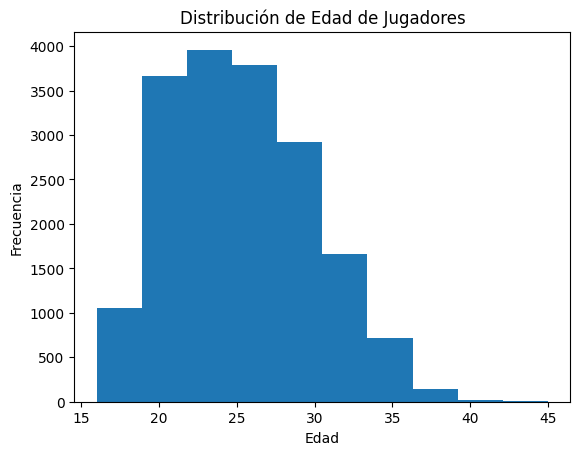

In [ ]:
fifa_df["Age"].plot.hist(bins=10)
plt.title("Distribución de Edad de Jugadores")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

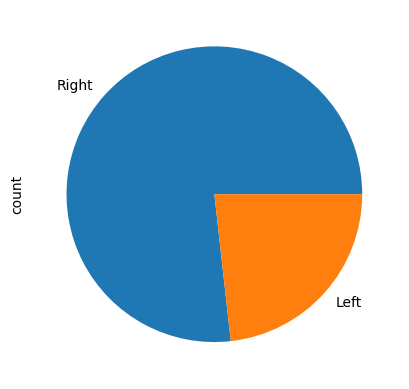

In [ ]:
fifa_df_foot=fifa_df["Preferred Foot"]
fifa_df_foot.value_counts().plot.pie()
plt.show()

### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

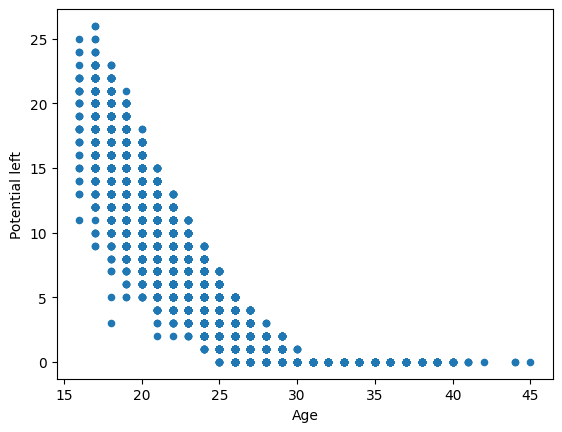

In [ ]:
fifa_df.plot.scatter(x="Age", y="Potential left")
plt.show()

¿Qué otras variables o mezcla de variables sería interesante visualizar?

<Axes: xlabel='Age', ylabel='Control'>

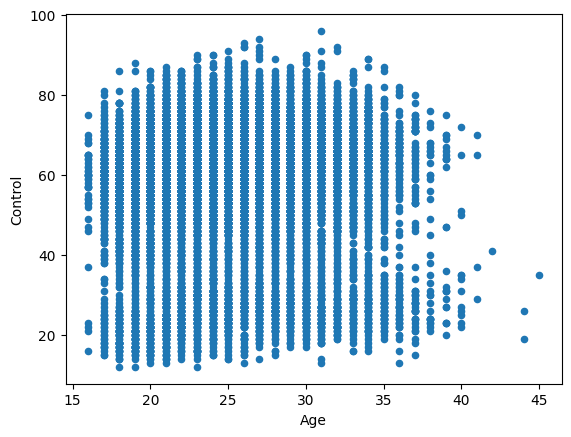

In [ ]:
fifa_df.plot.scatter(x="Age", y="Control")

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades?

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```